# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read in data from csv
df = pd.read_csv('./data/kc_house_data_train.csv', index_col=0)
# preview data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
# get descriptive statistics of df
round(df.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00,17290.00
mean,4.565502e+09,540739.55,3.37,2.11,2081.46,15243.40,1.49,0.01,0.24,3.41,7.65,1789.31,292.16,1970.79,83.81,98078.19,47.56,-122.21,1987.99,12873.48
std,2.874656e+09,373318.98,0.94,0.77,920.02,42304.62,0.54,0.09,0.78,0.65,1.17,829.27,443.15,29.34,400.33,53.61,0.14,0.14,684.80,27227.44
min,1.000102e+06,75000.00,0.00,0.00,290.00,572.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,2.114701e+09,321000.00,3.00,1.50,1430.00,5081.25,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5111.25
50%,3.903650e+09,450000.00,3.00,2.25,1920.00,7642.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1840.00,7622.50
75%,7.301150e+09,645000.00,4.00,2.50,2550.00,10725.75,2.00,0.00,0.00,4.00,8.00,2214.50,560.00,1996.00,0.00,98118.00,47.68,-122.13,2360.00,10101.75
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,858132.00


Drop ID column, just name not needed

In [4]:
df.drop(['id'], axis=1, inplace=True)

Convert date column to datetime

In [5]:
# Convert date sold column to datetime can't really use this because only 1 year span, but easier to read
df['date']=pd.to_datetime(df['date'])

Figure out how to deal with outliers in `bedrooms`, `bath`, all sqft columns

**Continuous Variables:**
- price
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- sqft_living15
- sqft_lot15

**Categorical Variables:**

_Intriniscially continous, but limited range so makes sense to categorize_
- bedrooms
- bathrooms
- floors

_Strictly categorical_
- waterfront
- view
- condition
- grade
- zipcode

**Nominal**
- lat/lon

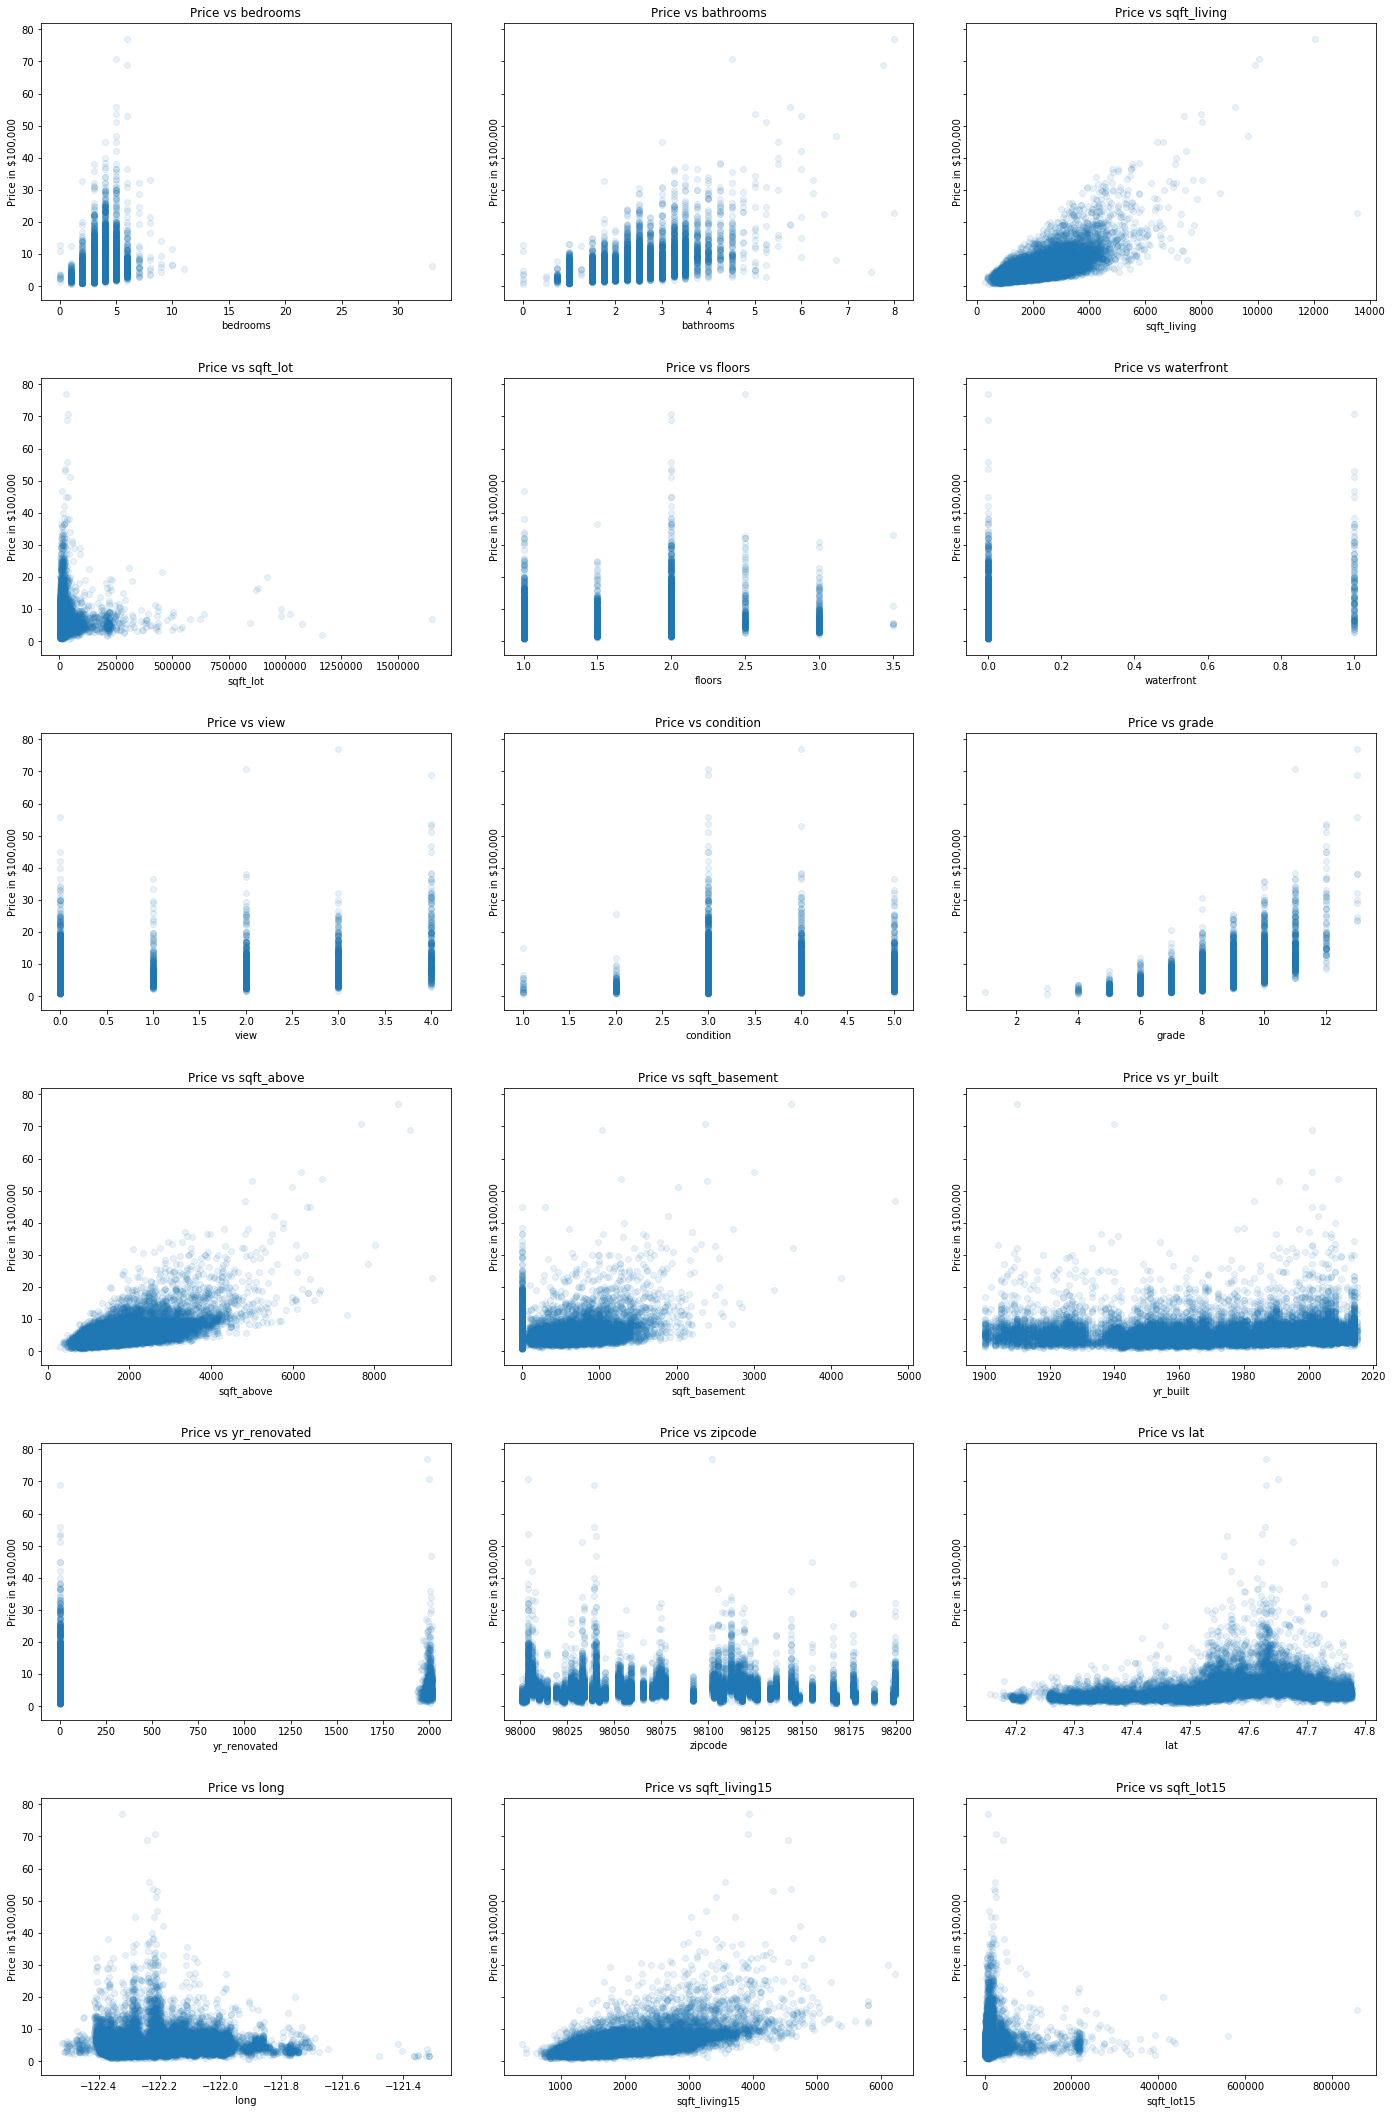

In [6]:
# Check linearity assumption for all features with target variable using scatter plots
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

**Preliminary observations from looking at scatterplots:**
- any data with Price vs. sqft (with the exception of lot which is minimal) has a clear linear relationship with price
- amount of bathrooms, bedrooms (although dicrete seem to have a linear relationship with price)
- houses with at least 2 floors seem to sell better
- certain zip codes have higher mean prices then others
- yr_built does NOT seem to have that much effect on price, although houses built during the 1930's (great depression) seem to have lower prices, or there were just not that many that were built
- yr_renovated does not seem to have an effect on price, may drop
- as long as house is in good (3.0) condition it seems to sell well
- grade has a linear relationship with price, also its discrete continous data


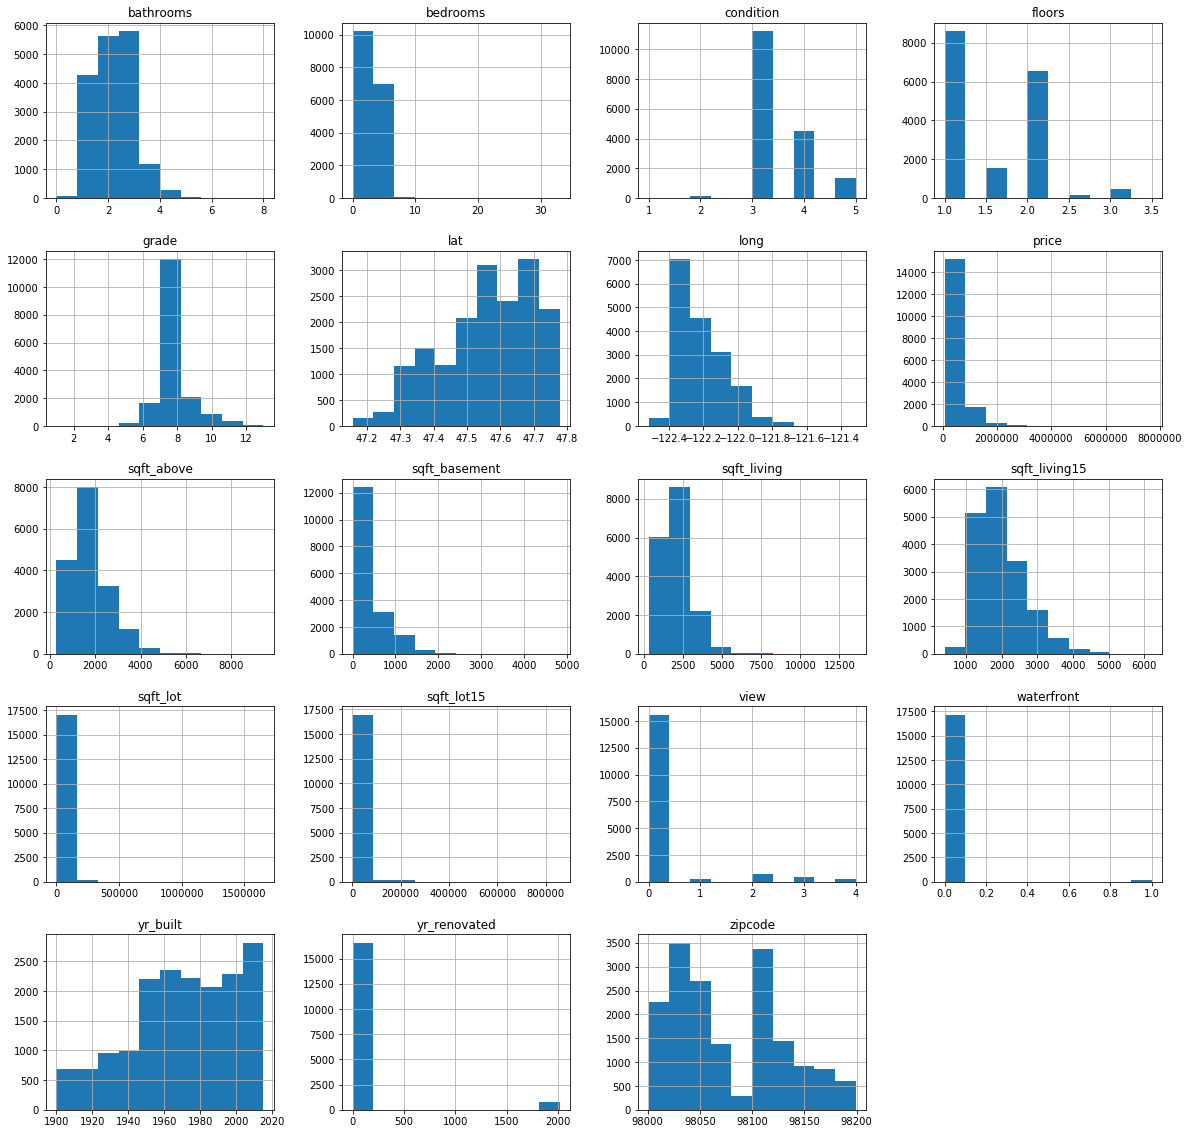

In [7]:
# look at histograms of data to see distributions
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax);

**Preliminary observations from looking at histograms**
- bathrooms generally btwn 1.5 - 4
- bedrooms under 5?
- most houses have condition around 3
- most houses have 1 floor
- most grades are around 7
- price has a positive skewness, should prob log transform to facilitate modeling
- must be some extreme outliers in all sqft because most distributions are positively skewed and can't even see larger propoerties binning
- most have a view of 0 and waterfront of 0
- starting in 1950's building of houses really started to take off
- proliferation of 0 on yr_renovated leads me to believe that most have NOT been renovated
- certain zipcodes have way more hourse then others



In [8]:
# investigate different dtypes in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null datetime64[ns]
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(14)
memory usage: 2.8 MB


Observations: 
- No NULL values
- Only 1 object column (date) which should prob be converted to datetime, or separated out to D/M/Y/DOW if doing calc
- Rest are float (5) and int (15)

In [9]:
# look at value_counts to identfy any outliers
for col in df.columns:
    print('\n')
    print(col, df[col].value_counts())



date 2014-06-25    111
2014-06-23    111
2014-06-26    106
2014-07-08    101
2015-04-22     99
             ... 
2014-11-02      1
2014-05-17      1
2015-05-10      1
2014-12-21      1
2015-05-24      1
Name: date, Length: 371, dtype: int64


price 350000.0     138
450000.0     136
550000.0     135
400000.0     123
500000.0     119
            ... 
418900.0       1
1544500.0      1
863500.0       1
234975.0       1
311300.0       1
Name: price, Length: 3534, dtype: int64


bedrooms 3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64


bathrooms 2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.

**Value count observations:**

`bedrooms` - bizarre 33 bedroom house, twelve 0 bedroom houses

`bathrooms` - eight 0 bathroom houses, also some outliers 6 and above?

`grade` - one 1 grade, 2 grade  3

Deal with bedrooms

In [10]:
df['bedrooms'].describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [11]:
# get the mean of bedrooms without 0 and 33 
mean_bed_no_outliers = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].mean()

In [12]:
# replace 33 and 0 with mean_bed_no_outliers
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(mean_bed_no_outliers), df['bedrooms'])

In [13]:
df['bedrooms'].describe()

count    17290.000000
mean         3.372817
std          0.907639
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

Deal with bathrooms

In [14]:
df['bathrooms'].describe()

count    17290.000000
mean         2.111943
std          0.770476
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [15]:
# seems like places with 6 or more bathrooms would be outliers, I re
print(sum(df['bathrooms'] >= 6.0))
# anything >= 6 is above 99.94% quantile
print(df['bathrooms'].quantile(.9994))

15
6.0


In [16]:
# get the mean of bathrooms without 0 and >= 6
mean_bath_no_outliers = df.loc[(df['bathrooms'] != 0) | (df['bathrooms'] < 6.0), 'bathrooms'].mean()

In [17]:
# replace 0 and >= 6.0 with mean_bath_no_outliers
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 6.0), round(mean_bath_no_outliers), df['bathrooms'])

In [18]:
df['bathrooms'].describe()

count    17290.000000
mean         2.108835
std          0.757112
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          5.750000
Name: bathrooms, dtype: float64

### Check for multicolinearity

In [19]:
# generate copy of df without target variable (price), date and lat/lon to perform multicolinearity check
df_pred = df.drop(['date', 'price', 'lat', 'long'], axis=1)
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,2390,7700
1,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,2370,6283
2,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,3710,9685
3,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,4050,14226
4,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,2250,4050


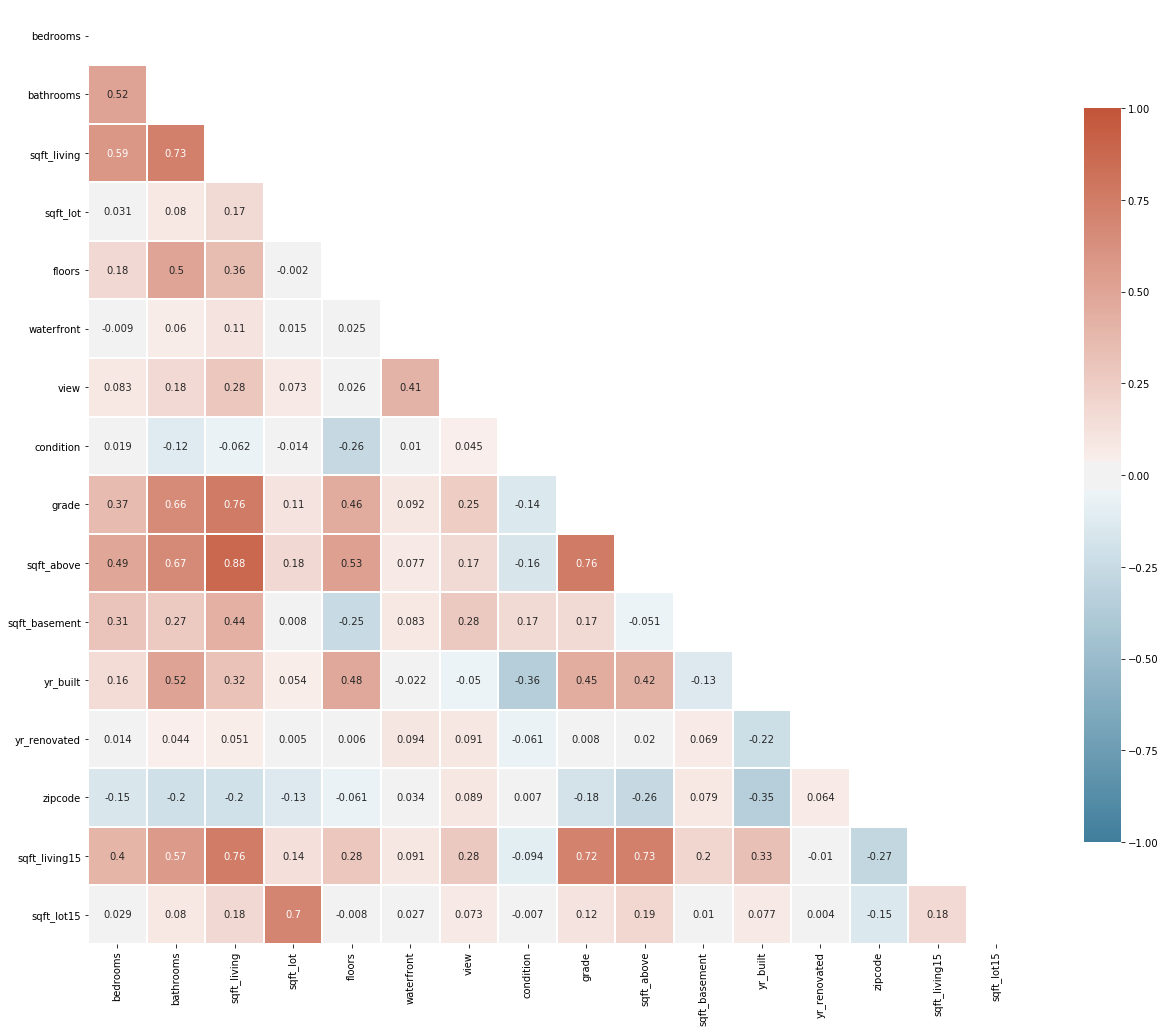

In [20]:
# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = round(df_pred.corr(), 3)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)

plt.show();

There is high correlation between `sqft_living`, `sqft_living15` and `sqft_above` as a result will probably only retain one of these. 

_Note:_ `grade` is on this high correlation list as well if kept as numerical, will probably be handled as a categorical

### Verify visual check for multicollinearity 

In [21]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [22]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876696
"(sqft_living, grade)",0.762929
"(grade, sqft_above)",0.758247
"(sqft_living, sqft_living15)",0.755066


After these checks for multicollinearity, I have decided to work with `sqft_living` and drop both `sqft_above` & `sqft_living15`.

I will work with `grade` as a categorical

## Should Statistical tests go here?

#### Questions
- Should I have taken out target variable from multi-colinearity check above?

- As a result of multicollinearity check above, I have decided to work with sqft_living and grade, dropping sqft_above/sqft_living15 and working with grade as a categorical. Is this ok?

- README says 4 visualations, are these the type he is looking for, or more specific to relationships between specific variables.

- Should I drop lat/lon or would it be interesting to utizlie in map to visualize pricing with coordinates or is zip
    code enough?
    
- How should I deal with outliers in bedrooms, bath and sqft columns? Mean, median? 

- How many predictors should I leave in? (reccomendation)

- When should I normalize data?

- Should I transform categorical data to strings in EDA?

- Which step do we transform features in?

## Preparing Categorical Data
Converting to categorical

In [23]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')

Log transform price column to better compare with categoricals

In [24]:
price_log = np.log(df['price'])
mean = price_log.mean()
std = price_log.std()
df['price_scaled'] = (price_log - mean) / std

Plotting categoricals with boxplots

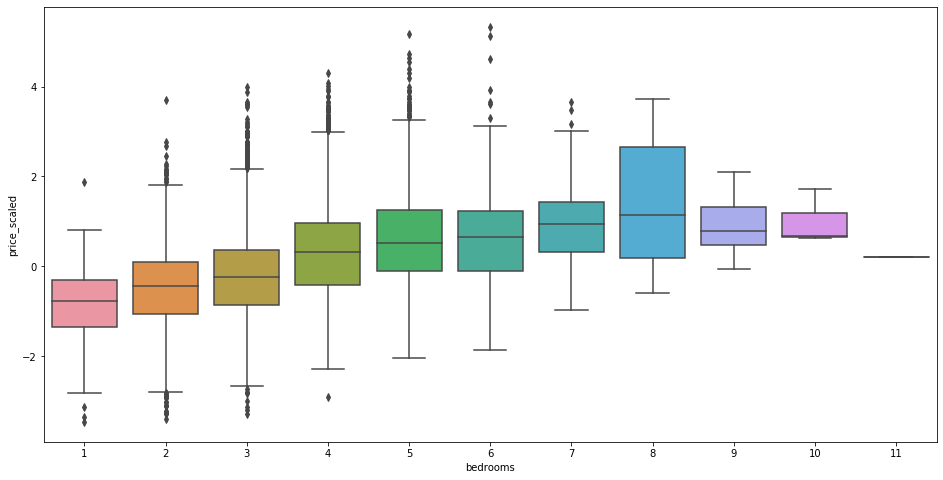

In [25]:
# bedrooms
var = 'bedrooms'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Number of bedrooms seem to have a direct correlation to price, once it hits 6, it seems to taper off. 

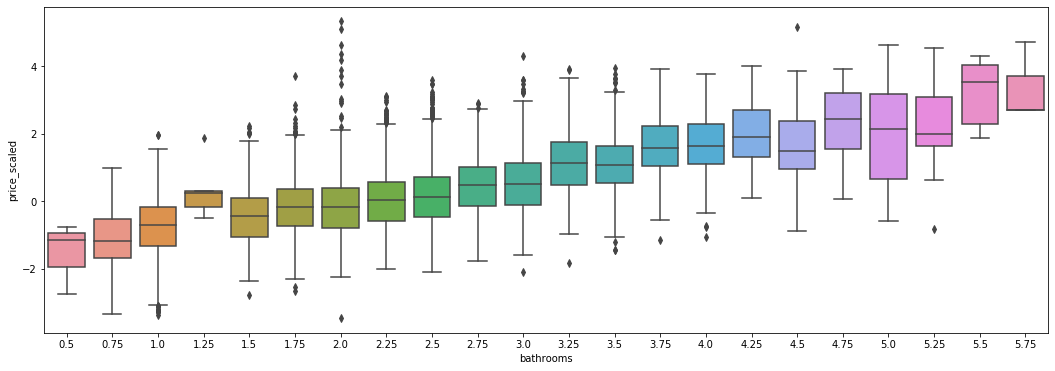

In [26]:
# bathrooms
var = 'bathrooms'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Number of bathrooms seem to have a direct correlation to price as well, steadily climbs as number goes up. 

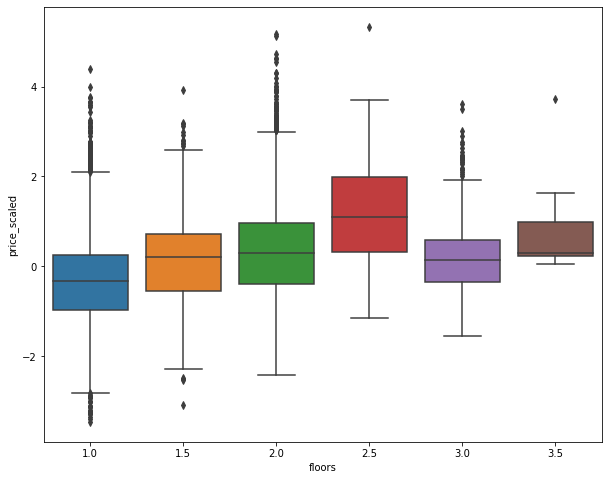

In [43]:
# floors
var = 'floors'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Once 2.5 (1st, 2nd and basement/attic) price seems to stabilize. 

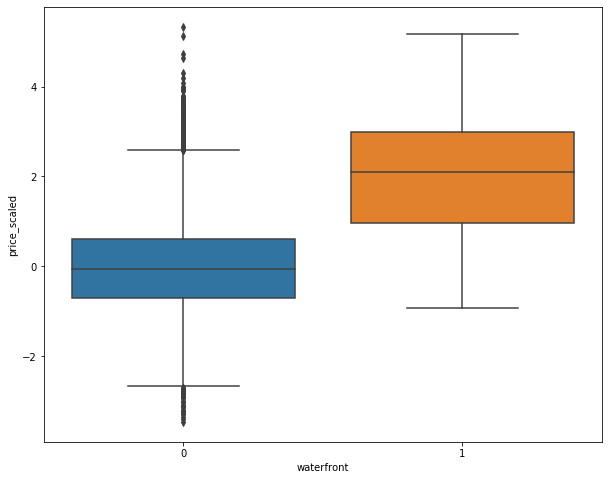

In [44]:
# waterfront
var = 'waterfront'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Obvious waterfront significantly higher mean price, not sure if it would be much of a predictor though since low
quantity of houses actually on waterfront, unless this was a more specific study. Probably won't use this predictor.

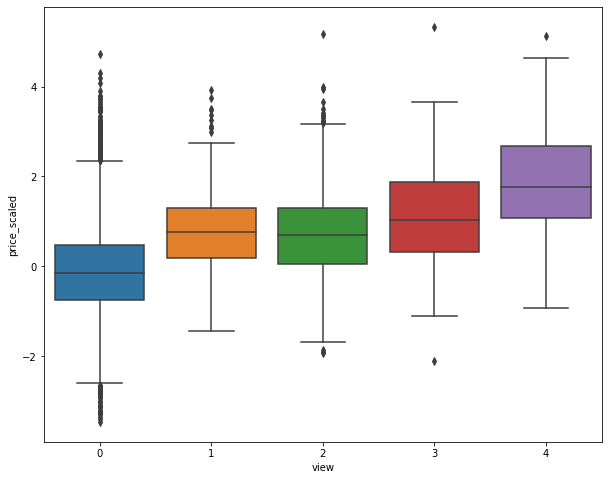

In [45]:
# view
var = 'view'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Better view indicates higher price, however there are still some higher priced homes with 0 view. 

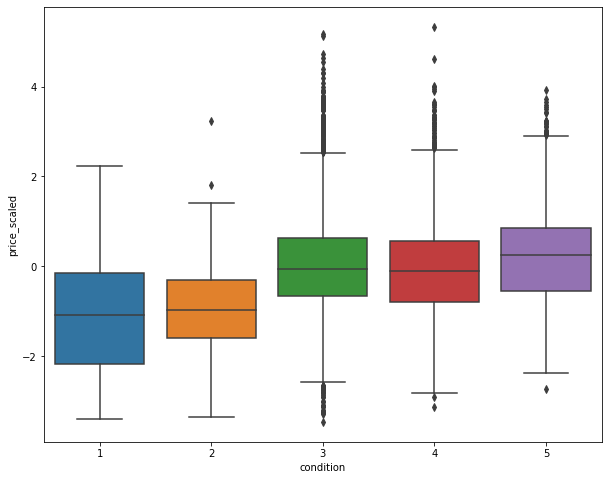

In [27]:
# condition
var = 'condition'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

Once `condition` hits 3, it seems like prices go up.

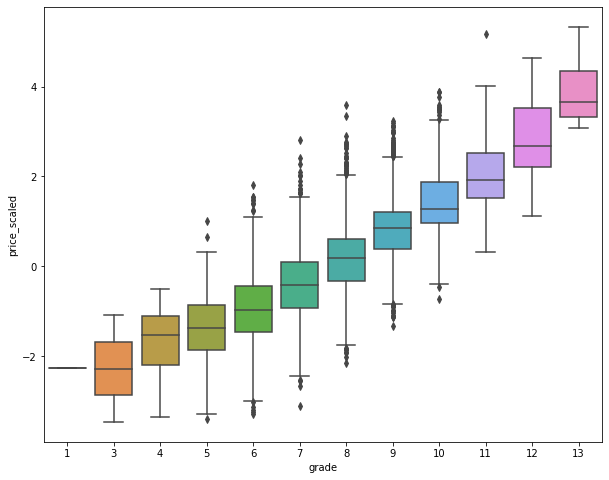

In [46]:
# grade
var = 'grade'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

`grade` has a strong relationship to price, will most likely use this as a predictor. 

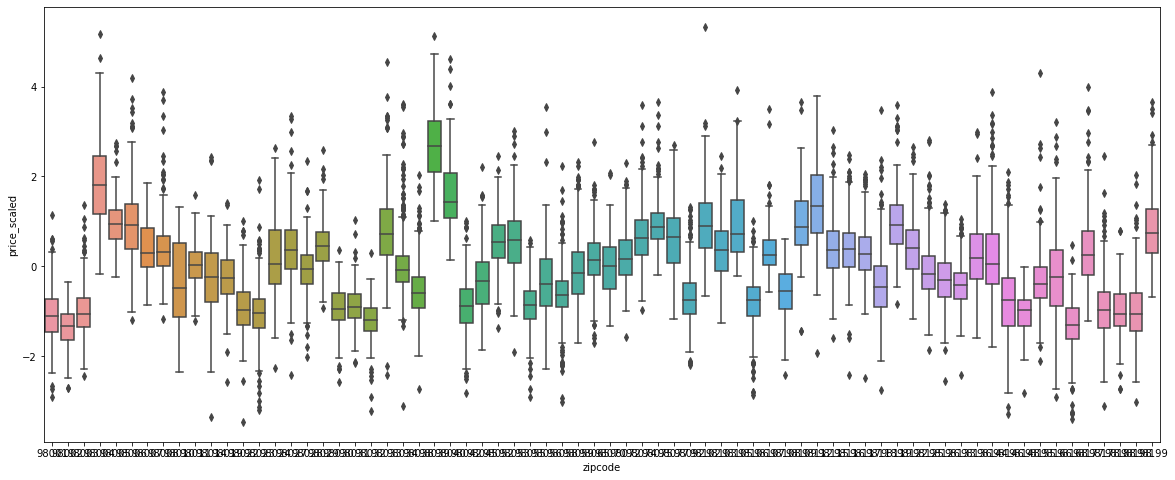

In [49]:
var = 'zipcode'
data = pd.concat([df['price_scaled'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x=var, y='price_scaled', data=data)

`zipcode` seem to be a strong predictor of `price`, however I am concered with creating dummy variables for this in fear of overfitting the model....if these were someway to create bins that had like zipcodes together i.e. demographically, school zones etc maybe that would be a better approach?

## Preparing Continuous data for model

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [29]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [30]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [31]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [32]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [33]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [34]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [35]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [36]:
#your code here 

### 5.4) Fit the model to the training data.

In [37]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [38]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [39]:
#your code here 

### 5.7) Determine if your model is overfit.

In [40]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [41]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [42]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/